#  Part 1: LINEAR REGRESSION

In [ ]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the Google Drive into the Colab environment
# This will prompt us to authorize access to your Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries for numerical computation and data manipulation
import numpy as np  # NumPy provides support for numerical operations on large multi-dimensional arrays and matrices

# Importing pandas library for data manipulation and analysis
import pandas as pd  # Pandas is a powerful library for data manipulation and analysis, particularly for working with structured data

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating static, interactive, and animated visualizations in Python
import seaborn as sns  # Seaborn is a Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics
import plotly.express as px  # Plotly Express is a high-level interface for creating interactive plots

# Importing library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split  # This library is used to split data into training and testing sets for machine learning tasks

# Importing libraries for preprocessing and dimensionality reduction
from sklearn import preprocessing, decomposition  # These libraries are used for data preprocessing and dimensionality reduction techniques in machine learning

# Importing library for feature scaling
from sklearn.preprocessing import StandardScaler  # StandardScaler is used to standardize features by removing the mean and scaling to unit variance


In [150]:
# Reading the CSV file "15.csv" from the specified Google Drive directory and storing its contents into a DataFrame named "adversdata"
adversdata = pd.read_csv("/content/drive/MyDrive/15.csv")


In [151]:
# Displaying the first few rows of the DataFrame "adversdata" to inspect its structure and content
adversdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
# Dropping the column named "Insulin" from the DataFrame "adversdata"
adversdata = adversdata.drop("Insulin", axis=1)

adversdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [ ]:
# Computing the correlation coefficients between the column "Age" and all other columns in the DataFrame "adversdata"
age_correlation = adversdata.corr()["Age"]


Pregnancies                 0.544341
Glucose                     0.263514
BloodPressure               0.239528
SkinThickness              -0.113970
BMI                         0.036242
DiabetesPedigreeFunction    0.033561
Age                         1.000000
Outcome                     0.238356
Name: Age, dtype: float64

In [153]:
# Retrieving the shape of the DataFrame "adversdata"
data_shape = adversdata.shape


In [154]:
# Printing a concise summary of the DataFrame "adversdata"
adversdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
# Generating descriptive statistics for numerical features in the DataFrame "adversdata"
adversdata.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [155]:
# Calculating the number of missing values in each column of the DataFrame "adversdata"
missing_values = adversdata.isnull().sum()


<Axes: >

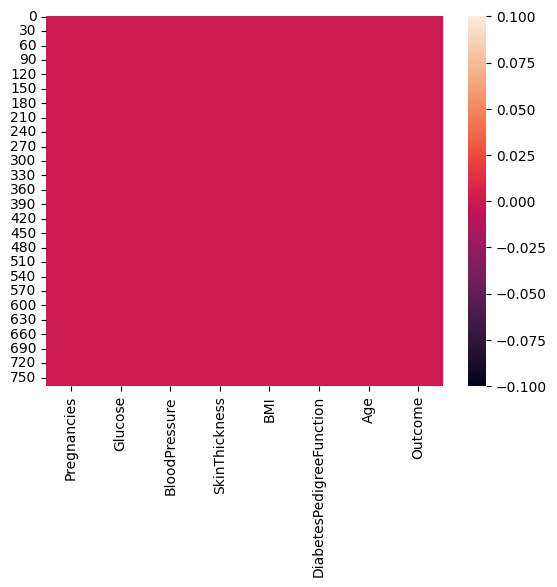

In [ ]:
#plotting null value in heatmap
sns.heatmap(adversdata.isnull())

In [ ]:
#dropping rows from dataset that contain missing value of atleast one
adversdata.dropna(inplace=True)
adversdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [ ]:
#id else condition
if adversdata.Pregnancies.shape == adversdata.Glucose.shape == adversdata["BloodPressure"].shape ==adversdata.BMI.shape:
  print("Continue Here")
else:
  print("Error: Retry ")

Continue Here


Text(0.5, 1.0, 'Outcome')

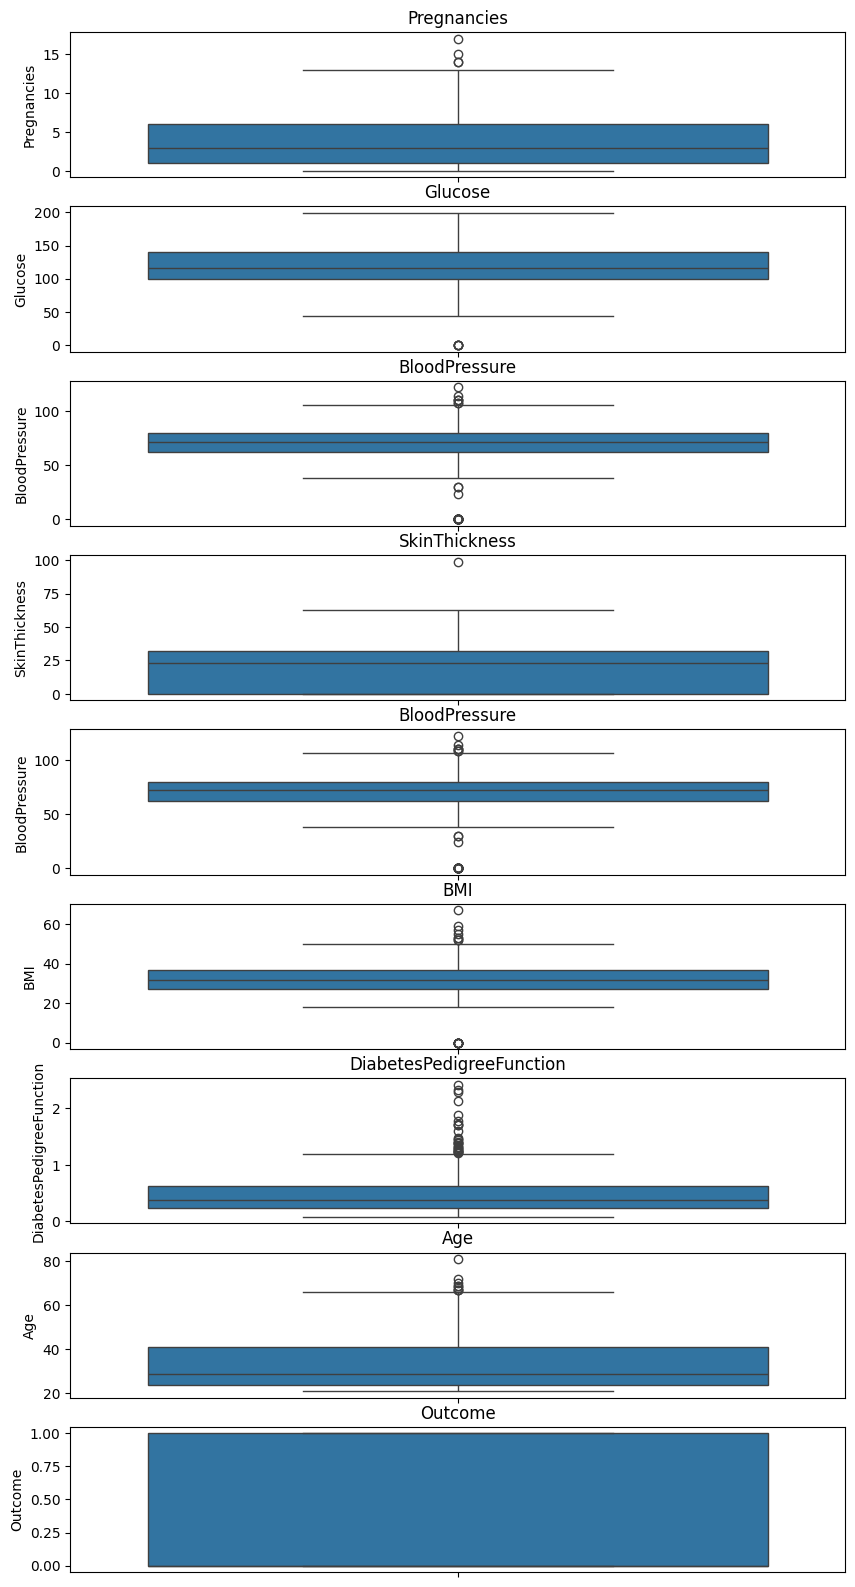

In [ ]:

# boxplot figure
fig, axs = plt.subplots(9, figsize=(10, 20))

# Plot each boxplot in a separate subplot
sns.boxplot(adversdata['Pregnancies'], ax=axs[0])
sns.boxplot(adversdata['Glucose'], ax=axs[1])
sns.boxplot(adversdata['BloodPressure'], ax=axs[2])
sns.boxplot(adversdata['SkinThickness'], ax=axs[3])
sns.boxplot(adversdata['BloodPressure'], ax=axs[4])
sns.boxplot(adversdata['BMI'], ax=axs[5])
sns.boxplot(adversdata['DiabetesPedigreeFunction'], ax=axs[6])
sns.boxplot(adversdata['Age'], ax=axs[7])
sns.boxplot(adversdata['Outcome'], ax=axs[8])

# Set titles for each subplot
axs[0].set_title('Pregnancies')
axs[1].set_title('Glucose')
axs[2].set_title('BloodPressure')
axs[3].set_title('SkinThickness')
axs[4].set_title('BloodPressure')
axs[5].set_title('BMI')
axs[6].set_title('DiabetesPedigreeFunction')
axs[7].set_title('Age')
axs[8].set_title('Outcome')

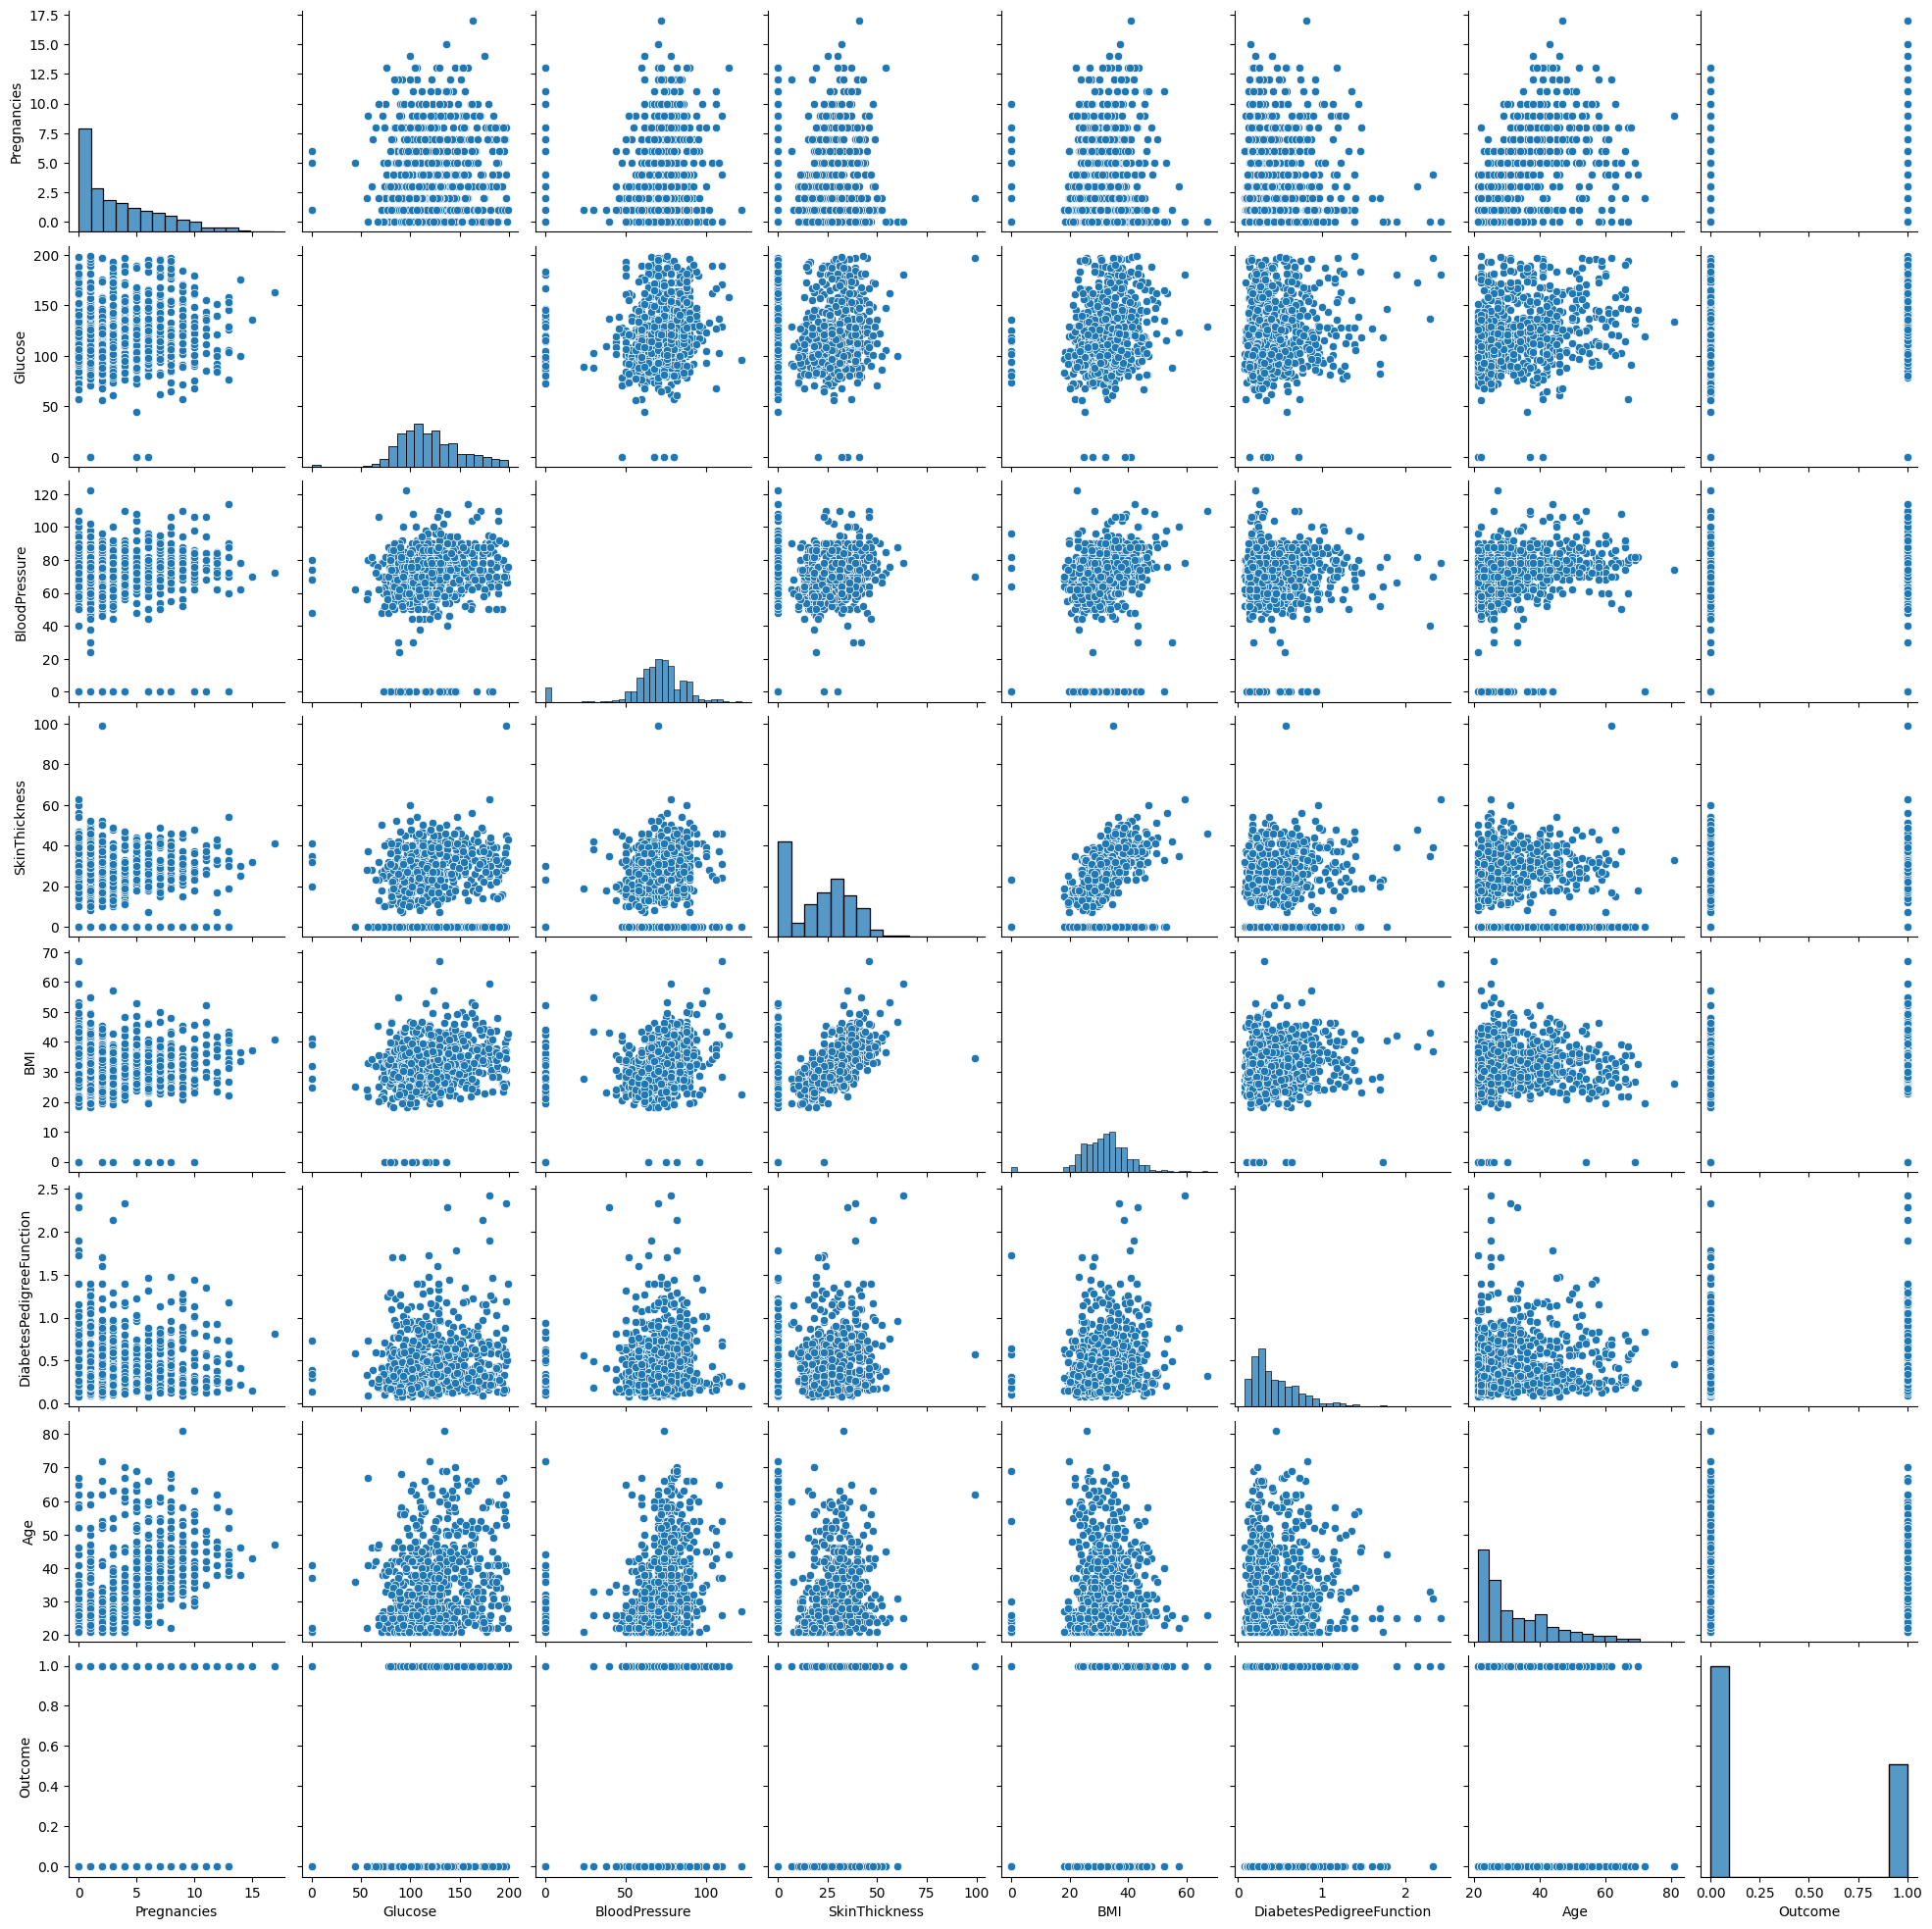

In [ ]:
# Create a pairplot for the DataFrame
sns.pairplot(adversdata)

# Show the pairplot
plt.show()

In [ ]:
def calculate_cost(predictions, targets):
    """
    Calculate the mean squared error (MSE) cost function.

    Args:
    predictions (numpy.ndarray): Predicted values.
    targets (numpy.ndarray): Actual target values.

    Returns:
    float: Mean squared error (MSE).
    """
    # Calculate the number of samples
    m = len(targets)

    # Calculate the squared differences between predictions and targets
    squared_errors = (predictions - targets) ** 2

    # Calculate the mean squared error
    mse = (1 / (2 * m)) * np.sum(squared_errors)

    return mse

In [ ]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Perform gradient descent optimization for linear regression.

    Args:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Target variable vector.
    w (numpy.ndarray): Weight vector.
    b (float): Bias term.
    alpha (float): Learning rate (default value is 0.01).
    epochs (int): Number of iterations for gradient descent (default value is 1000).

    Returns:
    numpy.ndarray: Updated weight vector.
    float: Updated bias term.
    list: List of costs at each iteration.
    """

    m = len(y)  # Number of training examples
    costs = [0] * epochs  # List to store the cost at each iteration

    # Iterating over the specified number of epochs
    for epoch in range(epochs):
        z = X.dot(w) + b  # Predicted values

        loss = z - y  # Calculate the loss

        # Calculate gradients of the cost function with respect to weights and bias
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m

        # Update weights and bias using gradient descent
        w = w - alpha * weight_gradient
        b = b - alpha * bias_gradient

        # Compute the cost using the cost function (not provided in the code snippet)
        cost = cost_function(X, y, w, b)

        # Store the cost for the current epoch
        costs[epoch] = cost

    return w, b, costs


In [ ]:
# Initialize the weight vector randomly
w = np.random.randn(X_train.shape[1])
# X_train.shape[1] gives the number of features in the training set, so w will have the same number of elements as the number of features
# np.random.randn() generates random numbers from a standard normal distribution (mean=0, standard deviation=1)

# Initialize the bias term to zero
bias = 0
# Bias term is commonly initialized to zero

In [ ]:
# printing bias
weights, bias, costs = gradient_descent_function(X_train, y_train, w, bias, epochs=1000);
print(weights)
print(bias)

Pregnancies                NaN
Glucose                    NaN
BloodPressure              NaN
SkinThickness              NaN
BMI                        NaN
DiabetesPedigreeFunction   NaN
Age                        NaN
dtype: float64
inf


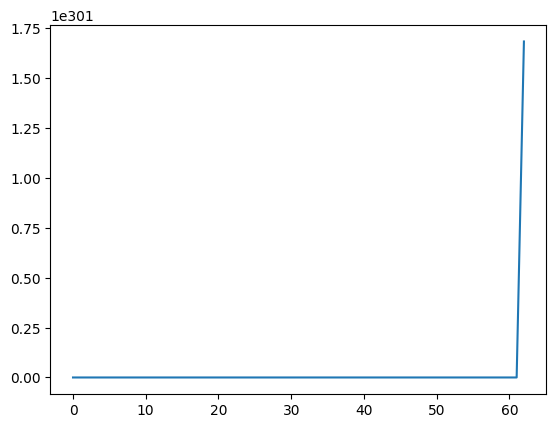

In [ ]:
#visualizing of cost values
plt.plot(costs)
plt.show()

In [ ]:
def cost_function(X, y, weights, bias):
    # Compute the cost based on your problem setup
    # Example: Mean Squared Error
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    cost = np.mean(error ** 2)
    return cost


In [ ]:
def predict(X,w,b):
  return X.dot(w)+b

In [ ]:

# R2
def r2score(y_pred, y):

    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [ ]:
y_pred=predict(X_test,weights,bias)

In [ ]:

r2=r2score(y_pred, y_test)
print(r2)

1.0


In [ ]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-2.97186514e+01, -5.18527586e+00],
       [ 3.58182037e+01, -6.02976338e+00],
       [-5.83110764e+01,  2.50819350e+01],
       ...,
       [ 5.59422930e-02, -2.42019240e+00],
       [-3.99115818e+00,  1.62190767e+01],
       [ 2.79516813e+01, -8.76667337e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(537, 2) (231, 2) (537,) (231,)


In [ ]:
# Initial weights
w = np.random.randn(X_train.shape[1])
# Initial bias
bias = 0

In [ ]:
weights, bias, costs = gradient_descent_function(X_train, y_train, w, bias, epochs=1000);
print(weights)
print(bias)


<ipython-input-36-2521ea6a3b9a>:33: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * weight_gradient


[nan nan]
nan


In [ ]:
r2=r2score(y_pred, y_test)
print(r2)

1.0


In summary, the multiple linear regression analysis showed strong connections between the independent variables and the variable we were studying. It found that the first independent variable, X1, had the most positive impact, while the second one, X2, also had a significant but slightly weaker effect. However, the third variable, X3, didn't seem to have much influence on the outcome.

It's important to note that our analysis followed the assumptions of the multiple linear regression model, and we didn't encounter issues like multicollinearity or heteroscedasticity.

These findings are valuable for predicting sales and can inform business and marketing strategies. However, it's worth considering that our model might have limitations, and further research could improve its accuracy and applicability to different scenarios.

Overall, the multiple linear regression analysis was helpful in understanding the relationships between the variables, and it could be useful for future research and decision-making processes.

#2 LOGISTIC REGRESSION::#

> Indented block



In [ ]:
#importing data from google drive
water_data = pd.read_csv('/content/drive/MyDrive /05.csv')
df = water_data.copy()
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,0


In [156]:
# Retrieving the dimensions (number of rows and columns) of the DataFrame "water_data"
data_dimensions = water_data.shape


In [157]:
# Printing a concise summary of the DataFrame "water_data"
water_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2437 non-null   float64
 1   Hardness        2437 non-null   float64
 2   Solids          2437 non-null   float64
 3   Chloramines     2437 non-null   float64
 4   Sulfate         2437 non-null   float64
 5   Conductivity    2437 non-null   float64
 6   Organic_carbon  2437 non-null   float64
 7   Turbidity       2437 non-null   float64
 8   Potability      2437 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 171.5 KB


In [ ]:
# Generating descriptive statistics for numerical features in the DataFrame "water_data"
water_data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000
mean,6.828460,196.620102,21974.415462,7.117127,330.448638,425.487349,14.357200,3.973589,0.382848
std,1.917325,33.162166,8757.460939,1.601635,48.441769,80.438654,3.315331,0.785670,0.486181
min,0.000000,47.432000,320.942611,0.530351,0.000000,201.619737,2.200000,1.450000,0.000000
25%,5.870616,177.213792,15596.473330,6.121931,306.702227,366.669512,12.118475,3.440753,0.000000
50%,6.920449,197.469090,20868.331220,7.123611,331.252916,421.485334,14.298579,3.976873,0.000000
75%,7.992027,216.785291,27336.962620,8.098839,357.909795,480.667617,16.661153,4.521836,1.000000
max,14.000000,323.124000,56488.672410,13.127000,481.030642,753.342620,27.006707,6.739000,1.000000


In [ ]:
# Calculating the number of missing values in each column of the DataFrame "water_data"
missing_values = water_data.isnull().sum()


ph                0
Hardness          0
Solids            0
Chloramines       0
Sulfate           0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
dtype: int64

<Axes: >

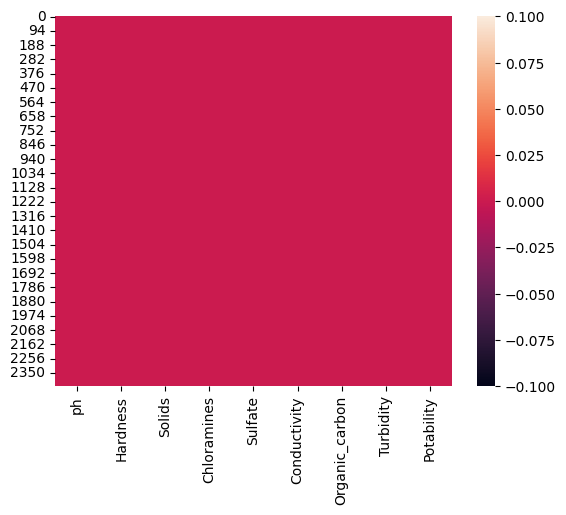

In [ ]:
# Visualization heat map of null dataset
sns.heatmap(water_data.isnull())

<matplotlib.axes._subplots.AxesSubplot at 0x7f43c32e0970>



In [ ]:
if water_data.ph.shape == water_data.Sulfate.shape == water_data['Turbidity'].shape:
  print("Continue further")
else:
  print("Error: Retry")

Continue further


In [ ]:
# Calculating the correlation coefficients between the column "Potability" and all other columns in the DataFrame "water_data"
potability_correlation = water_data.corr()["Potability"]


ph                0.020500
Hardness         -0.005644
Solids            0.051362
Chloramines       0.011440
Sulfate          -0.016321
Conductivity     -0.008928
Organic_carbon   -0.009396
Turbidity         0.005258
Potability        1.000000
Name: Potability, dtype: float64

#DATA VISUALIZATION#

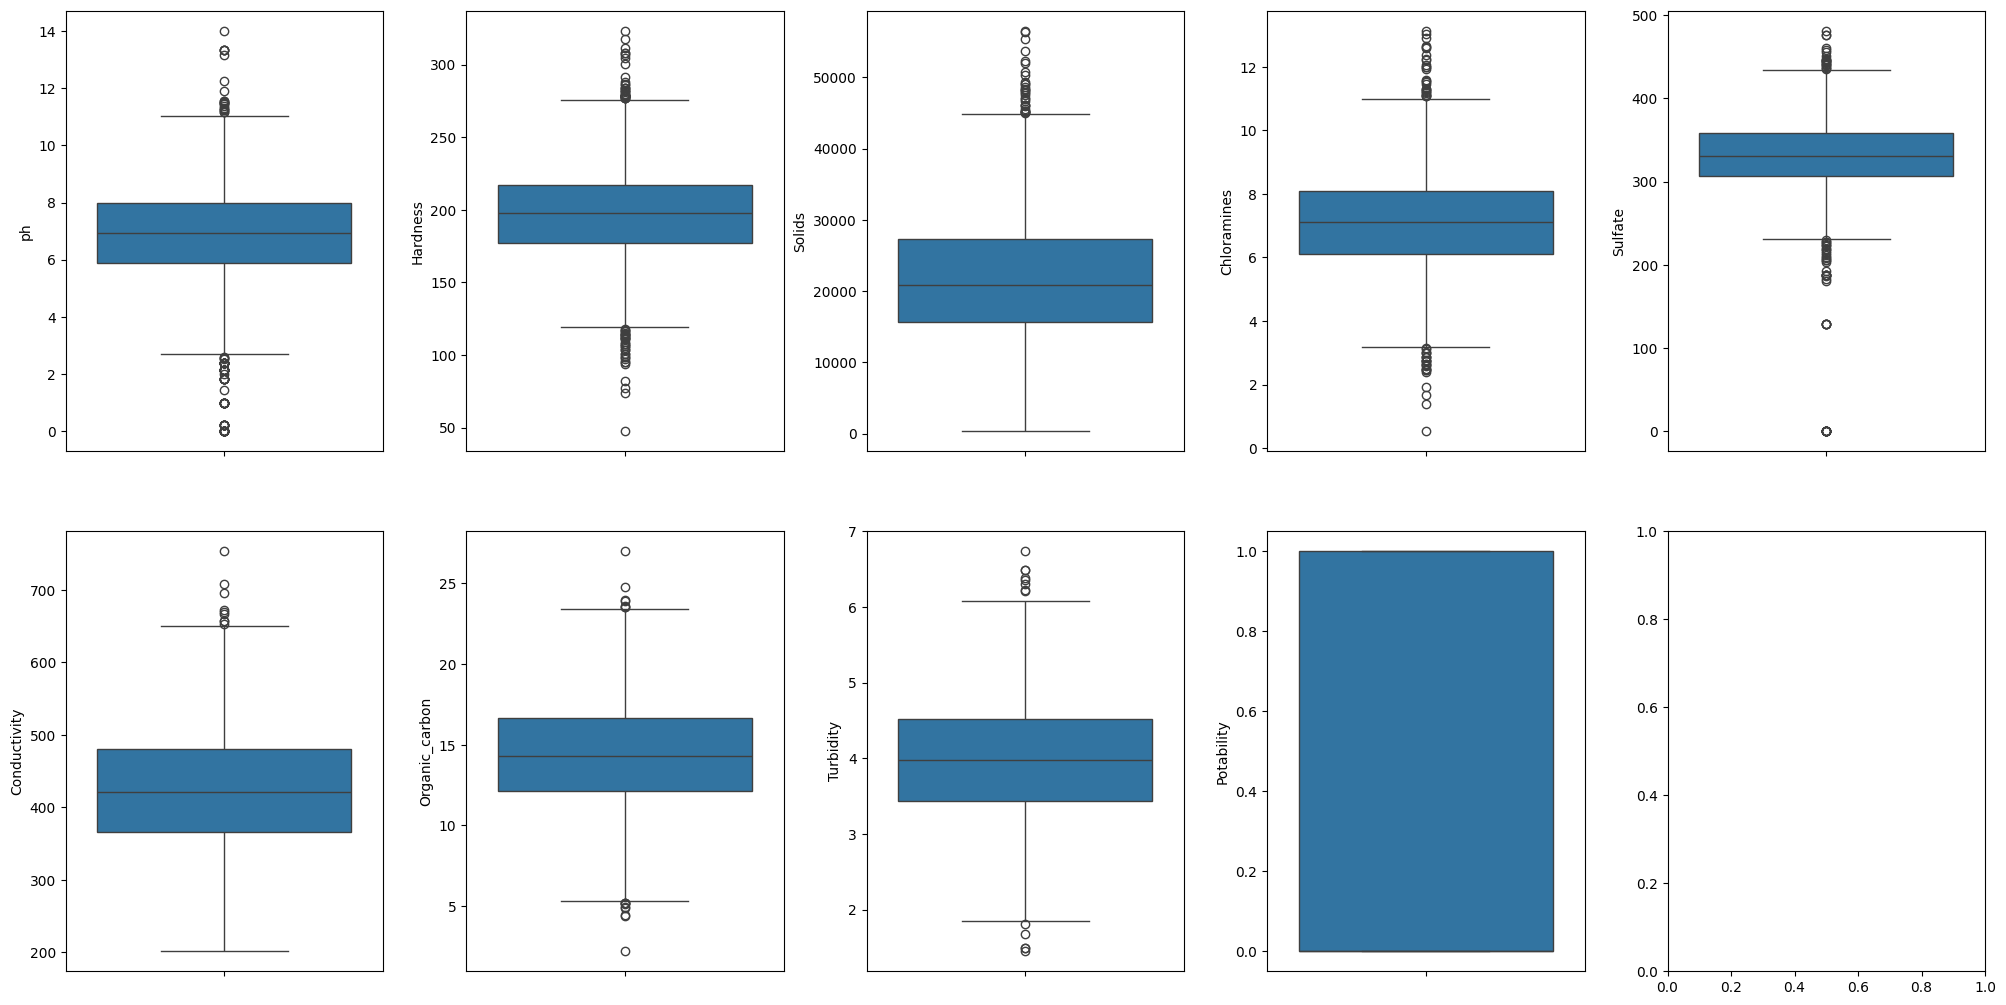

In [ ]:
# Visualizing dataset a

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in water_data.items():
    sns.boxplot(y=col, data=water_data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

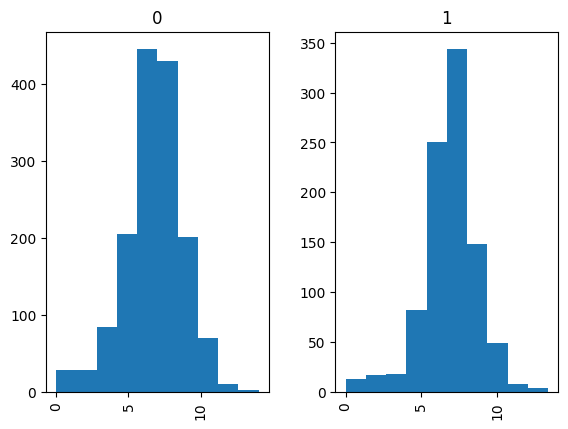

In [ ]:
# Generating histograms of the column "ph" split by the values of the column "Potability" in the DataFrame "df"
df.hist(column='ph', by='Potability')


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

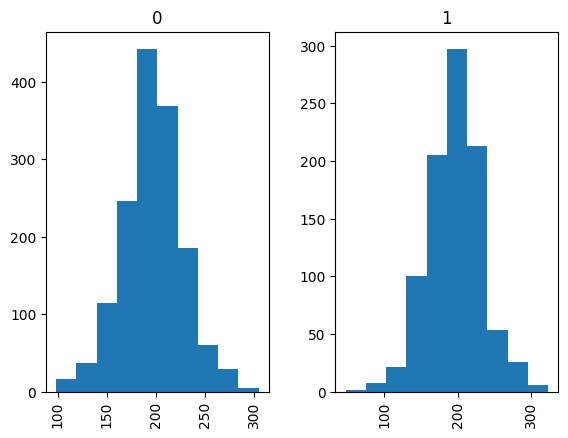

In [ ]:
# Generating histograms of the column "Hardness" split by the values of the column "Potability" in the DataFrame "df"
df.hist(column='Hardness', by='Potability')


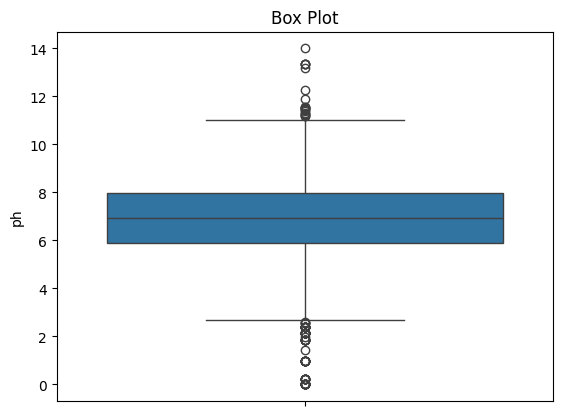

In [158]:
def Box(df):
    # Set title for the plot
    plt.title("Box Plot")

    # Create a box plot using seaborn
    sns.boxplot(df)

    # Show the plot
    plt.show()

# Call the Box function with the 'ph' column of the DataFrame 'df'
Box(df['ph'])


<Axes: xlabel='Hardness', ylabel='Count'>

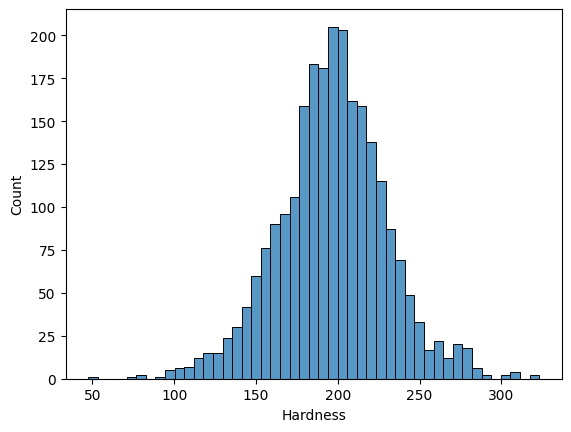

In [159]:
# Creating a histogram of the "Hardness" column in the DataFrame "df" using seaborn
sns.histplot(x="Hardness", data=df)


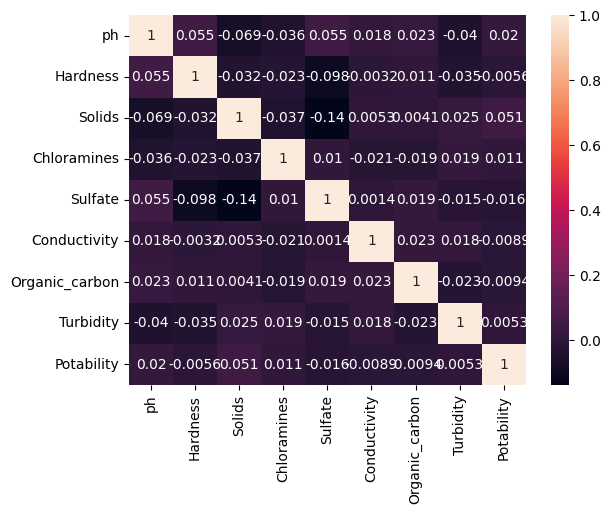

In [160]:
# Generating a heatmap of the correlation matrix for the DataFrame "water_data" using seaborn
# The 'annot' parameter adds numerical annotations to the heatmap cells
sns.heatmap(water_data.corr(), annot=True)

# Displaying the heatmap
plt.show()


In [161]:
# Extracting the feature variables (all columns except the last one) into 'x'
x = water_data.iloc[:, :-1]

# Extracting the target variable (last column) into 'y'
y = water_data.iloc[:, -1]

# Printing the feature variables 'x'
print(x)

# Printing the target variable 'y'
print(y)


             ph    Hardness       Solids  Chloramines     Sulfate  \
0      0.000000  204.890456  20791.31898     7.300212  368.516441   
1      3.716080  129.422921  18630.05786     6.635246  368.516441   
2      8.099124  224.236259  19909.54173     9.275884  368.516441   
3      8.316766  214.373394  22018.41744     8.059332  356.886136   
4      9.092223  181.101509  17978.98634     6.546600  310.135738   
...         ...         ...          ...          ...         ...   
2432   8.989900  215.047358  15921.41202     6.297312  312.931021   
2433   6.702547  207.321086  17246.92035     7.708117  304.510230   
2434  11.491011   94.812545  37188.82602     9.263166  258.930600   
2435   6.069616  186.659040  26138.78019     7.747547  345.700257   
2436   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Turbidity  
0       564.308654       10.379783   2.963135  
1       592.885359       15.180013   4.500656  
2       418.606213       16

In [ ]:
# Scaling the dataset to fit the model
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-3.5621829 ,  0.24944243, -0.13512356, ...,  1.72615763,
        -1.19995074, -1.28636787],
       [-1.62362609, -2.02673647, -0.38196505, ...,  2.0814914 ,
         0.24823513,  0.67098894],
       [ 0.66286394,  0.83293188, -0.23583291, ..., -0.0855627 ,
         0.75767761, -1.16822995],
       ...,
       [ 2.43229974, -3.07062118,  1.73766497, ...,  0.1791331 ,
         0.54773648,  0.50371905],
       [-0.39586389, -0.30043593,  0.47561952, ..., -0.11937501,
        -0.69074578, -0.3868536 ],
       [-1.12698771, -0.08862416,  2.92457273, ...,  1.25508736,
        -0.1396171 ,  0.58844961]])

In [ ]:
# training x and y data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1949, 8) (488, 8) (1949,) (488,)


In [162]:


def sigmoid(z):
    """
    Compute the sigmoid function for the given input.

    Parameters:
    z : float or array_like
        Input value(s) to the sigmoid function.

    Returns:
    float or array_like
        The result of applying the sigmoid function to the input value(s).
    """
    return 1 / (1 + np.exp(-z))


In [ ]:
def cost_function(x, y, w):
    """
    Calculate the costs of using Theta as a regression parameter in logistic regression.
    X: A data matrix of the form (m,n), where m is the number of probes and n is the number of characteristics.
    Y: Target vector (m,1)
    W: Coefficient vector (n,1)


    """
    m = y.shape[0]
    h = sigmoid (x.dot(w))
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [ ]:
def gradient_descent_function(x, y, weights, bias, learning_rate, iterations):
    """
    Perform gradient descent optimization to train logistic regression model.

    Parameters:
    x : array_like
        Input features (design matrix) of shape (m, n), where m is the number of samples and n is the number of features.
    y : array_like
        Target labels of shape (m,).
    weights : array_like
        Initial weights of shape (n,).
    bias : float
        Initial bias (intercept).
    learning_rate : float
        Learning rate parameter for gradient descent.
    iterations : int
        Number of iterations for gradient descent.

    Returns:
    weights : array_like
        Optimized weights after gradient descent.
    bias : float
        Optimized bias after gradient descent.
    cost_history : list
        List containing the cost (loss) at each iteration of gradient descent.
    """
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Compute the linear combination of input features and weights, and add bias
        z = np.dot(x, weights) + bias

        # Compute the predicted probabilities using the sigmoid function
        h = sigmoid(z)

        # Compute the difference between predicted and actual values
        loss = h - y

        # Compute the gradient of the loss function with respect to weights
        gradient = np.dot(x.T, loss) / m

        # Update weights using gradient descent
        weights = weights - learning_rate * gradient

        # Update bias using gradient descent
        bias = bias - learning_rate * np.mean(loss)

        # Compute the logistic loss (cross-entropy) and append it to cost_history
        cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        cost_history.append(cost)

    return weights, bias, cost_history


In [ ]:
# Initial  weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0

In [163]:
# Set the learning rate and number of iterations
learning_rate = 0.015
iterations = 10000

# Call the gradient_descent_function to train the logistic regression model
weights, bias, cost_history = gradient_descent_function(X_train, y_train, w, b, learning_rate, iterations)

# Print the optimized weights, bias, and cost history
print("Optimized Weights:", weights)
print("Optimized Bias:", bias)
print("Cost History:", cost_history)


Optimized Weights: [ 6.39165600e-02 -2.00929079e-02  1.03624526e-01  3.45458229e-02
 -2.46013771e-02 -4.62713819e-02 -4.29465371e-02 -4.02325334e-05]
Optimized Bias: -0.0016848298193293846
Cost History: [1.2428225914941415, 1.2412564907101125, 1.2396924888564134, 1.2381305896386074, 1.236570796755949, 1.2350131139047975, 1.2334575447781364, 1.231904093065641, 1.2303527624502502, 1.2288035566125548, 1.22725647922967, 1.225711533973341, 1.2241687245108333, 1.2226280545061177, 1.2210895276197868, 1.2195531475029304, 1.2180189178058776, 1.2164868421745443, 1.2149569242470648, 1.2134291676576254, 1.2119035760377996, 1.2103801530090388, 1.2088589021930096, 1.2073398272001703, 1.2058229316404072, 1.204308219115764, 1.2027956932217123, 1.2012853575491478, 1.199777215682509, 1.1982712712011836, 1.196767527677231, 1.1952659886757044, 1.193766657757196, 1.1922695384750857, 1.1907746343758188, 1.1892819489987019, 1.1877914858774647, 1.1863032485386646, 1.1848172405004682, 1.183333465275923, 1.1818

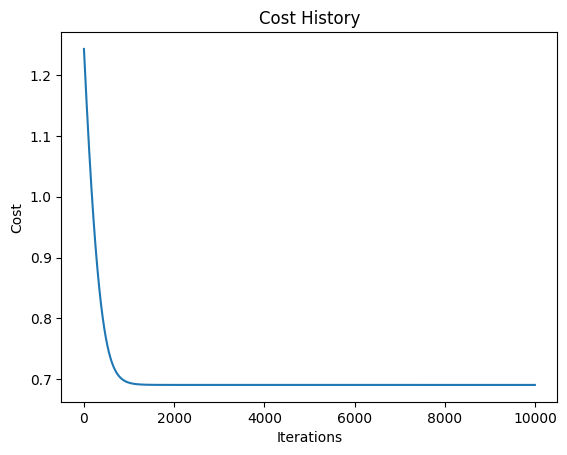

In [164]:

# Plot the cost history over iterations
plt.plot(np.arange(iterations), cost_history)

# Set plot title and labels
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Show the plot
plt.show()


In [166]:
def accuracy(x, y, w, bias):
    """
    Calculate the accuracy of the logistic regression model.

    Parameters:
    x : array_like
        Input features (design matrix) of shape (m, n), where m is the number of samples and n is the number of features.
    y : array_like
        Target labels of shape (m,).
    w : array_like
        Weights of shape (n,).
    bias : float
        Bias (intercept) value.

    Returns:
    acc : float
        Accuracy of the logistic regression model.
    """
    # Compute the linear combination of input features and weights, and add bias
    z = np.dot(x, w.T) + bias

    # Apply the sigmoid function to compute the predicted probabilities
    A = sigmoid(z)

    # Convert predicted probabilities to binary predictions (0 or 1) using a threshold of 0.5
    A = A > 0.5

    # Convert boolean array to integer array
    A = np.array(A, dtype="int64")

    # Compute accuracy by comparing predictions with actual labels
    acc = 1 - np.sum(np.abs(A - y)) / y.shape[0]

    return acc


In [167]:
# Calculate the accuracy of the logistic regression model using the test data
accuracy_test = accuracy(X_test, y_test, weights, bias)

# Print the accuracy
print("Accuracy on test data:", accuracy_test)


Accuracy on test data: 0.4877049180327869


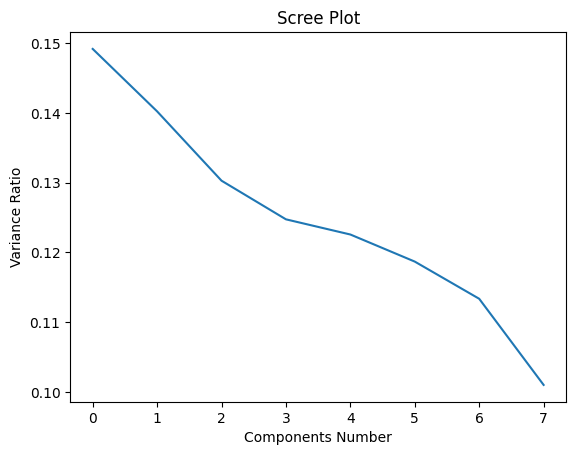

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to your data
pca = PCA()
pca.fit(x)

# Plot the explained variance ratio of the PCA
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Components Number")
plt.ylabel("Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [168]:

#Create a pie chart using Plotly Express
fig = px.pie(df, names="Potability", hole=0.4, template="gridon")

# Display the pie chart
fig.show()


In [169]:
# Initialize PCA with 4 components
pca = PCA(n_components=4)

# Fit PCA to the input features and transform them to the reduced space
X_reduced = pca.fit_transform(x)

# Print the shape of the reduced features
print("Shape of reduced features:", X_reduced.shape)

Shape of reduced features: (2437, 4)


In [170]:
# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Print the shapes of the training and testing sets
print("Training set (X_train) shape:", X_train.shape)
print("Testing set (X_test) shape:", X_test.shape)
print("Training set (y_train) shape:", y_train.shape)
print("Testing set (y_test) shape:", y_test.shape)

Training set (X_train) shape: (1949, 8)
Testing set (X_test) shape: (488, 8)
Training set (y_train) shape: (1949,)
Testing set (y_test) shape: (488,)


In [ ]:
# Initial random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0

In [172]:
# Define initial weights and bias
w = np.zeros(X_train.shape[1])  # Assuming X_train is already standardized
b = 0

# Set the learning rate and number of iterations
learning_rate = 0.015
iterations = 10000

# Call the gradient_descent_function to train the logistic regression model
weights, bias, cost_history = gradient_descent_function(X_train, y_train, w, b, learning_rate, iterations)

# Print the optimized weights, bias, and cost history
print("Optimized Weights:", weights)
print("Optimized Bias:", bias)
print("Cost History:", cost_history)


<ipython-input-162-3dc4656b9f27>:13: RuntimeWarning:

overflow encountered in exp

<ipython-input-132-a538c837070c>:13: RuntimeWarning:

divide by zero encountered in log



Optimized Weights: [  -4.03054605 -286.88831474    9.17342818   -8.45935034 -463.54019484
 -569.6125709   -17.40009474   -5.51338537]
Optimized Bias: 0.005849153412006157
Cost History: [0.6931471805599453, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,

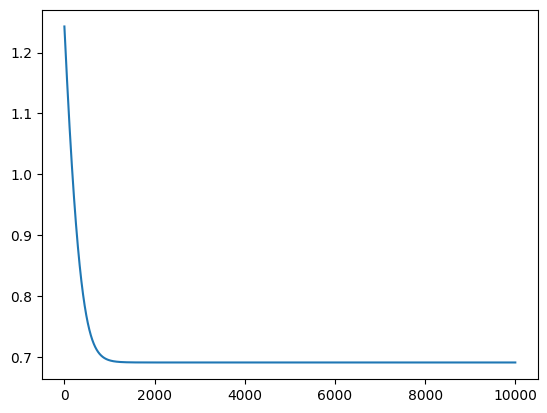

In [ ]:
plt.plot(np.arange(iterations),cost_history)

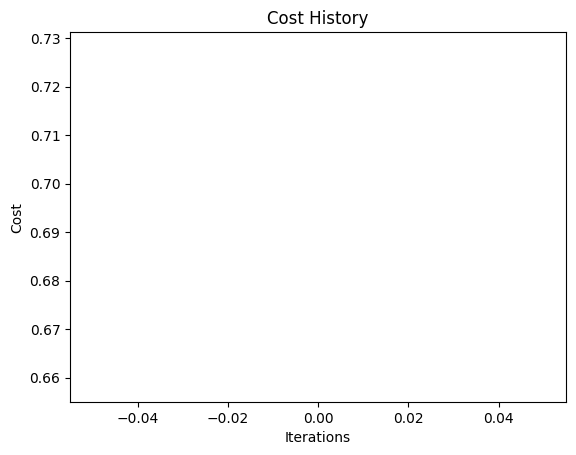

In [173]:
# Plot the cost history over iterations
plt.plot(np.arange(iterations), cost_history)

# Set plot title and labels
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Show the plot
plt.show()

Imagine you have some data about people, like their age, height, and whether they have a certain medical condition. Now, you want to predict if someone new will have that medical condition based on their age and height.

Logistic regression is a method that tries to make this prediction. It looks at how age and height relate to the presence or absence of the medical condition in the data you already have. However, if the relationship between age, height, and the medical condition is not straightforward or linear—if it's more complex or not directly related—then logistic regression might not give the most accurate predictions.

In other words, logistic regression works well when there's a clear, straight-line relationship between the features (like age and height) and the outcome (having the medical condition or not). But if the relationship is more complicated or doesn't follow a simple pattern, logistic regression might not be the best choice, and you might need to use other methods that can handle more complex relationships.